# Python 프로그래밍 Pandas
## 데이터프레임 Dataframe

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Pandas
- DataFrame이 무엇인지 이해한다.
- csv파일, 엑셀파일, DB의데이터를 가져오고 다시 저장해본다
- 탐색적분석을 수행해 본다
- 필요한 데이터를 선택해 가져온다
- 변수를 만들어 Dataframe에 추가하고 삭제한다
- DataFrame을 서로 연결한다

## Pandas 란
- 다른 Dataframe이나 고차원 객체로부터 컬럼을 추가 삭제
- group by함수
- 라벨 등을 이용한 데이터 부분 집합 추출
- 데이터 세로 가로 합치기
- 외부 데이터 연동의 견고함(CSV, Excel, databases, HDF5지원)
- missing data(NaN) 처리

https://pandas.pydata.org/pandas-docs/stable/

In [3]:
import os
import numpy as np
import pandas as pd

In [12]:
dir_path = 'D:/자료/python2020/1A1A/data/'
data = pd.read_csv(dir_path + '도로교통공단_전국_사망교통사고정보(2018)_20190910.csv') # 한글명 파일이 잘 안읽힘

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 0: invalid start byte

In [52]:
data = pd.read_csv(dir_path + '도로교통공단_전국_사망교통사고정보(2018)_20190910.csv', encoding='euc-kr')
data.head(3)

,발생년,발생년월일시분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2018,2018-02-14 6:35,주,수,1,1,0,0,0,서울,...,단일로,기타단일로,승용차,승용차,보행자,보행자,950497.0,1954702.0,126.939274,37.590388
1,2018,2018-09-02 5:23,야,일,1,1,0,0,0,서울,...,교차로,교차로횡단보도내,승용차,승용차,보행자,보행자,953337.0,1950150.0,126.971732,37.549508
2,2018,2018-12-15 22:35,야,토,1,1,0,0,0,서울,...,단일로,기타단일로,이륜차,이륜차,없음,없음,956967.0,1954807.0,127.012552,37.591659


In [54]:
df.shape
df.발생년.unique()

(3657, 28)

array([2018], dtype=int64)

In [73]:
df.loc[np.random.choice(data.shape[0], 5)]

,발생년,발생년월일시분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,...,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,A,B
2739,2019,2018-12-08 5:38,야,토,1,1,0,0,0,서울,...,자전거,자전거,화물차,화물차,964678.0,1943323.0,127.100447,37.488478,2739,True
1673,2018,2018-03-05 19:25,야,월,1,2,1,0,0,경남,...,승용차,승용차,승용차,승용차,1073104.0,1665199.0,128.300912,34.979062,1673,True
2748,2018,2018-03-17 10:10,주,토,1,2,0,1,0,부산,...,특수차,특수차,승용차,승용차,1127573.0,1687539.0,128.900978,35.175047,2748,True
3348,2019,2018-03-29 8:20,주,목,1,1,0,0,0,충남,...,승용차,승용차,이륜차,이륜차,958470.0,1876712.0,127.033931,36.887799,3348,True
986,2018,2018-02-04 5:30,야,일,1,1,0,0,0,경기,...,승용차,승용차,보행자,보행자,949845.0,1930300.0,126.933552,37.370411,986,True


In [74]:
df.loc[np.random.choice(data.shape[0], df.shape[0]//5), '발생년'] = 2015
df.loc[np.random.choice(data.shape[0], df.shape[0]//5), '발생년'] = 2016
df.loc[np.random.choice(data.shape[0], df.shape[0]//5), '발생년'] = 2017
df.loc[np.random.choice(data.shape[0], df.shape[0]//5), '발생년'] = 2018
df.loc[np.random.choice(data.shape[0], df.shape[0]//5), '발생년'] = 2019

df.발생년.unique()

array([2019, 2017, 2016, 2015, 2018], dtype=int64)

In [ ]:
data.to_csv(dir_path + '도로교통공단_교통사고다발지역_20191010.csv', encoding='euc-kr')

# 기본정보

In [23]:
for i in range(3):
    data.iloc[:, i*10:(i+1)*10].head()

,발생년,발생년월일시분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도
0,2018,2018-02-14 6:35,주,수,1,1,0,0,0,서울
1,2018,2018-09-02 5:23,야,일,1,1,0,0,0,서울
2,2018,2018-12-15 22:35,야,토,1,1,0,0,0,서울
3,2018,2018-08-23 11:30,주,목,1,1,0,0,0,서울
4,2018,2018-07-16 0:50,야,월,1,1,0,0,0,서울


,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별
0,서대문구,차대사람,횡단중,횡단중,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차
1,용산구,차대사람,횡단중,횡단중,운전자법규위반,안전운전 의무 불이행,교차로,교차로횡단보도내,승용차,승용차
2,성북구,차량단독,공작물충돌,공작물충돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,이륜차,이륜차
3,강북구,차량단독,기타,기타,운전자법규위반,기타(운전자법규위반),단일로,기타단일로,승합차,승합차
4,강북구,차대사람,기타,기타,운전자법규위반,안전운전 의무 불이행,교차로,교차로횡단보도내,화물차,화물차


,피해자_당사자종별_대분류,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,보행자,보행자,950497.0,1954702.0,126.939274,37.590388
1,보행자,보행자,953337.0,1950150.0,126.971732,37.549508
2,없음,없음,956967.0,1954807.0,127.012552,37.591659
3,없음,없음,958020.0,1959193.0,127.024227,37.631240
4,보행자,보행자,957606.0,1958258.0,127.019590,37.622794


In [24]:
data.describe()
data.dtypes
data.info()

,발생년,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
count,3657.0,3657.000000,3657.000000,3657.000000,3657.000000,3657.000000,3.657000e+03,3.657000e+03,3657.000000,3657.000000
mean,2018.0,1.033908,1.557561,0.220399,0.277550,0.025704,1.005988e+06,1.817367e+06,127.564288,36.350459
std,0.0,0.231419,1.646903,0.733751,1.098448,0.260230,7.829082e+04,1.183245e+05,0.868589,1.067857
min,2018.0,1.000000,1.000000,0.000000,0.000000,0.000000,8.567940e+05,1.470725e+06,125.936161,33.221528
25%,2018.0,1.000000,1.000000,0.000000,0.000000,0.000000,9.456370e+05,1.720625e+06,126.895036,35.472360
50%,2018.0,1.000000,1.000000,0.000000,0.000000,0.000000,9.749880e+05,1.823164e+06,127.220528,36.403647
75%,2018.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.076253e+06,1.928830e+06,128.346943,37.358135
max,2018.0,8.000000,39.000000,13.000000,29.000000,10.000000,1.293632e+06,2.049835e+06,130.820632,38.445604


발생년                int64
발생년월일시분           object
주야                object
요일                object
사망자수               int64
사상자수               int64
중상자수               int64
경상자수               int64
부상신고자수             int64
발생지시도             object
발생지시군구            object
사고유형_대분류          object
사고유형_중분류          object
사고유형              object
법규위반_대분류          object
법규위반              object
도로형태_대분류          object
도로형태              object
가해자_당사자종별_대분류     object
가해자_당사자종별         object
피해자_당사자종별_대분류     object
피해자_당사자종별         object
발생위치X_UTMK       float64
발생위치Y_UTMK       float64
경도               float64
위도               float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   발생년            3657 non-null   int64  
 1   발생년월일시분        3657 non-null   object 
 2   주야             3657 non-null   object 
 3   요일             3657 non-null   object 
 4   사망자수           3657 non-null   int64  
 5   사상자수           3657 non-null   int64  
 6   중상자수           3657 non-null   int64  
 7   경상자수           3657 non-null   int64  
 8   부상신고자수         3657 non-null   int64  
 9   발생지시도          3657 non-null   object 
 10  발생지시군구         3657 non-null   object 
 11  사고유형_대분류       3657 non-null   object 
 12  사고유형_중분류       3657 non-null   object 
 13  사고유형           3657 non-null   object 
 14  법규위반_대분류       3657 non-null   object 
 15  법규위반           3657 non-null   object 
 16  도로형태_대분류       3657 non-null   object 
 17  도로형태           3657 non-null   object 
 18  가해자_당사자종

In [26]:
data.count()
data.nunique()
data.사고유형.unique()

발생년              3657
발생년월일시분          3657
주야               3657
요일               3657
사망자수             3657
사상자수             3657
중상자수             3657
경상자수             3657
부상신고자수           3657
발생지시도            3657
발생지시군구           3657
사고유형_대분류         3657
사고유형_중분류         3657
사고유형             3657
법규위반_대분류         3657
법규위반             3657
도로형태_대분류         3657
도로형태             3657
가해자_당사자종별_대분류    3657
가해자_당사자종별        3657
피해자_당사자종별_대분류    3657
피해자_당사자종별        3657
발생위치X_UTMK       3657
발생위치Y_UTMK       3657
경도               3657
위도               3657
dtype: int64

발생년                 1
발생년월일시분          3617
주야                  2
요일                  7
사망자수                5
사상자수               19
중상자수               10
경상자수               15
부상신고자수              6
발생지시도              17
발생지시군구            206
사고유형_대분류            4
사고유형_중분류           15
사고유형               16
법규위반_대분류            2
법규위반               17
도로형태_대분류            6
도로형태               12
가해자_당사자종별_대분류      13
가해자_당사자종별          13
피해자_당사자종별_대분류      14
피해자_당사자종별          14
발생위치X_UTMK       3626
발생위치Y_UTMK       3633
경도               3656
위도               3657
dtype: int64

array(['횡단중', '공작물충돌', '기타', '보도통행중', '차도통행중', '추돌', '측면충돌', '길가장자리구역통행중',
       '정면충돌', '전복', '전도', '도로이탈 추락', '도로이탈 기타', '후진중충돌', '주/정차차량 충돌',
       '철길건널목'], dtype=object)

In [27]:
data.isnull().head()

,발생년,발생년월일시분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
data.notnull().head()

,발생년,발생년월일시분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별_대분류,가해자_당사자종별,피해자_당사자종별_대분류,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [29]:
data.isnull().sum()
data.isnull().sum().sum()

발생년              0
발생년월일시분          0
주야               0
요일               0
사망자수             0
사상자수             0
중상자수             0
경상자수             0
부상신고자수           0
발생지시도            0
발생지시군구           0
사고유형_대분류         0
사고유형_중분류         0
사고유형             0
법규위반_대분류         0
법규위반             0
도로형태_대분류         0
도로형태             0
가해자_당사자종별_대분류    0
가해자_당사자종별        0
피해자_당사자종별_대분류    0
피해자_당사자종별        0
발생위치X_UTMK       0
발생위치Y_UTMK       0
경도               0
위도               0
dtype: int64

0

In [31]:
data.quantile(np.arange(0.1,1.0, 0.10).tolist())

,발생년,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0.1,2018.0,1.0,1.0,0.0,0.0,0.0,925557.68,1669868.16,126.670949,35.021508
0.2,2018.0,1.0,1.0,0.0,0.0,0.0,939384.28,1696500.40,126.825276,35.259107
0.3,2018.0,1.0,1.0,0.0,0.0,0.0,950918.18,1749749.00,126.949806,35.736916
0.4,2018.0,1.0,1.0,0.0,0.0,0.0,961862.40,1778608.00,127.068693,35.992535
0.5,2018.0,1.0,1.0,0.0,0.0,0.0,974988.00,1823164.00,127.220528,36.403647
0.6,2018.0,1.0,1.0,0.0,0.0,0.0,998906.40,1867892.00,127.487744,36.807274
0.7,2018.0,1.0,1.0,0.0,0.0,0.0,1052042.60,1914736.00,128.079615,37.230532
0.8,2018.0,1.0,2.0,0.0,0.0,0.0,1094777.80,1941904.80,128.551523,37.473904
0.9,2018.0,1.0,3.0,1.0,1.0,0.0,1130146.76,1955787.12,128.941806,37.600767


In [32]:
data.사고유형.value_counts()
data.사고유형.value_counts().index

횡단중           791
기타            775
측면충돌          526
공작물충돌         388
추돌            379
정면충돌          212
차도통행중         205
도로이탈 추락       104
전도            101
길가장자리구역통행중     68
보도통행중          40
전복             34
도로이탈 기타        29
후진중충돌           2
철길건널목           2
주/정차차량 충돌       1
Name: 사고유형, dtype: int64

Index(['횡단중', '기타', '측면충돌', '공작물충돌', '추돌', '정면충돌', '차도통행중', '도로이탈 추락', '전도',
       '길가장자리구역통행중', '보도통행중', '전복', '도로이탈 기타', '후진중충돌', '철길건널목', '주/정차차량 충돌'],
      dtype='object')

In [33]:
type(data.사고유형.value_counts())
data.사고유형.value_counts()['횡단중']
data.사고유형.value_counts().sort_values()
data.사고유형.value_counts().sort_index()

pandas.core.series.Series

791

주/정차차량 충돌       1
후진중충돌           2
철길건널목           2
도로이탈 기타        29
전복             34
보도통행중          40
길가장자리구역통행중     68
전도            101
도로이탈 추락       104
차도통행중         205
정면충돌          212
추돌            379
공작물충돌         388
측면충돌          526
기타            775
횡단중           791
Name: 사고유형, dtype: int64

공작물충돌         388
기타            775
길가장자리구역통행중     68
도로이탈 기타        29
도로이탈 추락       104
보도통행중          40
전도            101
전복             34
정면충돌          212
주/정차차량 충돌       1
차도통행중         205
철길건널목           2
추돌            379
측면충돌          526
횡단중           791
후진중충돌           2
Name: 사고유형, dtype: int64

In [36]:
data.columns
data['A'] = 0.5
data['A'] = np.arange(data.shape[0])
data[['발생년', '사고유형']].head()
data['B'] = data['A'] >= 500
data.B.value_counts()
data.B.value_counts(dropna = False)
data['B'].sort_values().head()
data['B'].sort_values().tail()

Index(['발생년', '발생년월일시분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류', '법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별_대분류', '가해자_당사자종별', '피해자_당사자종별_대분류',
       '피해자_당사자종별', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도', 'A'],
      dtype='object')

,발생년,사고유형
0,2018,횡단중
1,2018,횡단중
2,2018,공작물충돌
3,2018,기타
4,2018,기타


True     3157
False     500
Name: B, dtype: int64

True     3157
False     500
Name: B, dtype: int64

0      False
341    False
340    False
339    False
338    False
Name: B, dtype: bool

1554    True
1555    True
1556    True
1558    True
3656    True
Name: B, dtype: bool

# groupby

In [42]:
df = data.copy()

In [75]:
df.groupby('발생년').사고유형.value_counts().unstack()

사고유형,공작물충돌,기타,길가장자리구역통행중,도로이탈 기타,도로이탈 추락,보도통행중,전도,전복,정면충돌,주/정차차량 충돌,차도통행중,철길건널목,추돌,측면충돌,횡단중,후진중충돌
발생년,,,,,,,,,,,,,,,,
2015,41.0,82.0,10.0,5.0,12.0,5.0,10.0,5.0,25.0,NaN,26.0,1.0,40.0,54.0,99.0,NaN
2016,50.0,106.0,8.0,6.0,14.0,3.0,17.0,5.0,22.0,NaN,28.0,NaN,52.0,66.0,111.0,NaN
2017,70.0,153.0,12.0,4.0,22.0,7.0,10.0,4.0,33.0,NaN,29.0,1.0,57.0,101.0,113.0,NaN
2018,121.0,263.0,22.0,4.0,37.0,15.0,28.0,14.0,80.0,NaN,64.0,NaN,132.0,176.0,260.0,1.0
2019,106.0,171.0,16.0,10.0,19.0,10.0,36.0,6.0,52.0,1.0,58.0,NaN,98.0,129.0,208.0,1.0


In [44]:
df.columns

Index(['발생년', '발생년월일시분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류', '법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별_대분류', '가해자_당사자종별', '피해자_당사자종별_대분류',
       '피해자_당사자종별', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도', 'A', 'B'],
      dtype='object')

In [76]:
pd.crosstab(df.발생년, df.사고유형)

사고유형,공작물충돌,기타,길가장자리구역통행중,도로이탈 기타,도로이탈 추락,보도통행중,전도,전복,정면충돌,주/정차차량 충돌,차도통행중,철길건널목,추돌,측면충돌,횡단중,후진중충돌
발생년,,,,,,,,,,,,,,,,
2015,41,82,10,5,12,5,10,5,25,0,26,1,40,54,99,0
2016,50,106,8,6,14,3,17,5,22,0,28,0,52,66,111,0
2017,70,153,12,4,22,7,10,4,33,0,29,1,57,101,113,0
2018,121,263,22,4,37,15,28,14,80,0,64,0,132,176,260,1
2019,106,171,16,10,19,10,36,6,52,1,58,0,98,129,208,1


In [77]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

summary(df)

,데이터형태(dtypes),결측치 수(null),고유값 수(nunique)
발생년,int64,0,5
발생년월일시분,object,0,3617
주야,object,0,2
요일,object,0,7
사망자수,int64,0,5
사상자수,int64,0,19
중상자수,int64,0,10
경상자수,int64,0,15
부상신고자수,int64,0,6
발생지시도,object,0,17


In [79]:
df.pivot_table(values='경상자수', index=['발생년'], columns =['사고유형'], aggfunc='count')

사고유형,공작물충돌,기타,길가장자리구역통행중,도로이탈 기타,도로이탈 추락,보도통행중,전도,전복,정면충돌,주/정차차량 충돌,차도통행중,철길건널목,추돌,측면충돌,횡단중,후진중충돌
발생년,,,,,,,,,,,,,,,,
2015,41.0,82.0,10.0,5.0,12.0,5.0,10.0,5.0,25.0,NaN,26.0,1.0,40.0,54.0,99.0,NaN
2016,50.0,106.0,8.0,6.0,14.0,3.0,17.0,5.0,22.0,NaN,28.0,NaN,52.0,66.0,111.0,NaN
2017,70.0,153.0,12.0,4.0,22.0,7.0,10.0,4.0,33.0,NaN,29.0,1.0,57.0,101.0,113.0,NaN
2018,121.0,263.0,22.0,4.0,37.0,15.0,28.0,14.0,80.0,NaN,64.0,NaN,132.0,176.0,260.0,1.0
2019,106.0,171.0,16.0,10.0,19.0,10.0,36.0,6.0,52.0,1.0,58.0,NaN,98.0,129.0,208.0,1.0


In [80]:
df.pivot_table(values='경상자수', index=['발생년'], columns =['사고유형'])

사고유형,공작물충돌,기타,길가장자리구역통행중,도로이탈 기타,도로이탈 추락,보도통행중,전도,전복,정면충돌,주/정차차량 충돌,차도통행중,철길건널목,추돌,측면충돌,횡단중,후진중충돌
발생년,,,,,,,,,,,,,,,,
2015,0.146341,0.195122,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.920000,NaN,0.000000,0.0,1.025000,0.314815,0.060606,NaN
2016,0.220000,0.150943,0.000000,0.166667,0.000000,0.000000,0.000000,0.0,0.590909,NaN,0.000000,NaN,0.519231,0.378788,0.009009,NaN
2017,0.042857,0.130719,0.000000,0.000000,0.000000,0.000000,0.100000,0.0,0.515152,NaN,0.137931,0.0,0.701754,0.435644,0.026549,NaN
2018,0.123967,0.247148,0.045455,0.000000,0.081081,0.066667,0.000000,0.0,0.750000,NaN,0.093750,NaN,1.037879,0.329545,0.100000,0.0
2019,0.113208,0.298246,0.187500,0.000000,0.052632,0.000000,0.055556,0.0,0.769231,0.0,0.034483,NaN,1.051020,0.658915,0.043269,0.0


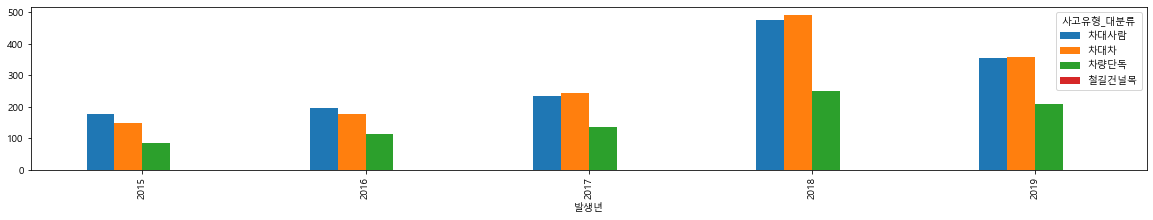

In [83]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'

df.groupby('발생년').사고유형_대분류.value_counts().unstack().plot(kind='bar', figsize=(20,3))

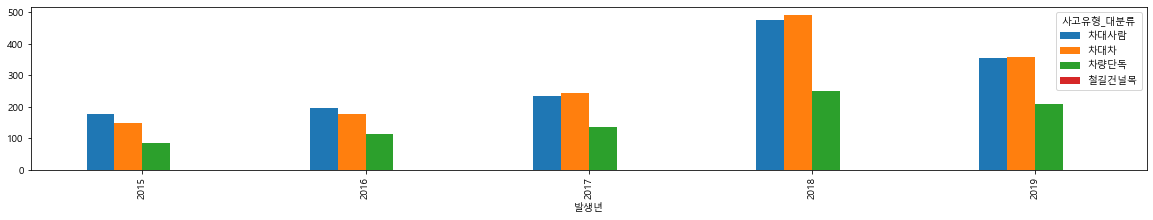

In [84]:
df.pivot_table(values='경상자수', index=['발생년'], columns =['사고유형_대분류'], aggfunc='count').plot(kind='bar', figsize=(20,3))

In [86]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

df.groupby('사고유형').사망자수.sum()

사고유형
공작물충돌         408
기타            798
길가장자리구역통행중     69
도로이탈 기타        33
도로이탈 추락       110
보도통행중          41
전도            101
전복             34
정면충돌          234
주/정차차량 충돌       1
차도통행중         205
철길건널목           2
추돌            404
측면충돌          545
횡단중           794
후진중충돌           2
Name: 사망자수, dtype: int64

In [90]:
df.pivot_table(values = '사망자수', index=['사고유형_대분류'], aggfunc=np.size)
df.pivot_table(values = '사망자수', index=['사고유형_대분류'], aggfunc=np.sum)
df.pivot_table(values = '사망자수', index=['사고유형_대분류'], aggfunc=np.mean)

,사망자수
사고유형_대분류,
차대사람,1436
차대차,1422
차량단독,797
철길건널목,2


,사망자수
사고유형_대분류,
차대사람,1443
차대차,1505
차량단독,831
철길건널목,2


,사망자수
사고유형_대분류,
차대사람,1.004875
차대차,1.058368
차량단독,1.042660
철길건널목,1.000000


In [91]:
df.사고유형.value_counts().sort_index()

공작물충돌         388
기타            775
길가장자리구역통행중     68
도로이탈 기타        29
도로이탈 추락       104
보도통행중          40
전도            101
전복             34
정면충돌          212
주/정차차량 충돌       1
차도통행중         205
철길건널목           2
추돌            379
측면충돌          526
횡단중           791
후진중충돌           2
Name: 사고유형, dtype: int64

사고유형
공작물충돌         408
기타            798
길가장자리구역통행중     69
도로이탈 기타        33
도로이탈 추락       110
보도통행중          41
전도            101
전복             34
정면충돌          234
주/정차차량 충돌       1
차도통행중         205
철길건널목           2
추돌            404
측면충돌          545
횡단중           794
후진중충돌           2
Name: 사망자수, dtype: int64

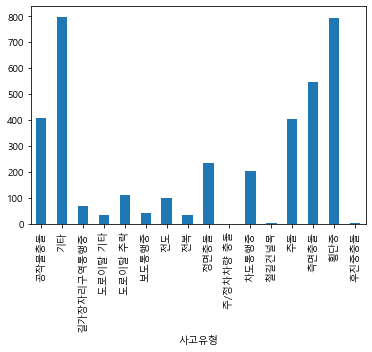

In [92]:
df.groupby('사고유형').사망자수.sum()
df.groupby('사고유형').사망자수.sum().plot(kind ='bar')

In [94]:
df.pivot_table(values = ['사망자수'], index=['사고유형_대분류', '발생년'], aggfunc=np.sum)

사망자수
사고유형_대분류 발생년       
차대사람     2015   178
         2016   197
         2017   234
         2018   477
         2019   357
차대차      2015   157
         2016   194
         2017   254
         2018   525
         2019   375
차량단독     2015    89
         2016   123
         2017   141
         2018   260
         2019   218
철길건널목    2015     1
         2017     1

In [95]:
df.pivot_table(values = ['사망자수'], index=['사고유형_대분류', '발생년'], aggfunc=np.sum).unstack()

사망자수                            
발생년        2015   2016   2017   2018   2019
사고유형_대분류                                   
차대사람      178.0  197.0  234.0  477.0  357.0
차대차       157.0  194.0  254.0  525.0  375.0
차량단독       89.0  123.0  141.0  260.0  218.0
철길건널목       1.0    NaN    1.0    NaN    NaN

In [96]:
df.pivot_table(values = ['사망자수'], index=['사고유형_대분류'], columns=['발생년'], aggfunc=np.sum)

사망자수                            
발생년        2015   2016   2017   2018   2019
사고유형_대분류                                   
차대사람      178.0  197.0  234.0  477.0  357.0
차대차       157.0  194.0  254.0  525.0  375.0
차량단독       89.0  123.0  141.0  260.0  218.0
철길건널목       1.0    NaN    1.0    NaN    NaN

In [97]:
df.groupby('사고유형').size()
df.groupby('사고유형').size().sort_values(ascending=False)
df['사고유형'].value_counts()

사고유형
공작물충돌         388
기타            775
길가장자리구역통행중     68
도로이탈 기타        29
도로이탈 추락       104
보도통행중          40
전도            101
전복             34
정면충돌          212
주/정차차량 충돌       1
차도통행중         205
철길건널목           2
추돌            379
측면충돌          526
횡단중           791
후진중충돌           2
dtype: int64

사고유형
횡단중           791
기타            775
측면충돌          526
공작물충돌         388
추돌            379
정면충돌          212
차도통행중         205
도로이탈 추락       104
전도            101
길가장자리구역통행중     68
보도통행중          40
전복             34
도로이탈 기타        29
후진중충돌           2
철길건널목           2
주/정차차량 충돌       1
dtype: int64

횡단중           791
기타            775
측면충돌          526
공작물충돌         388
추돌            379
정면충돌          212
차도통행중         205
도로이탈 추락       104
전도            101
길가장자리구역통행중     68
보도통행중          40
전복             34
도로이탈 기타        29
후진중충돌           2
철길건널목           2
주/정차차량 충돌       1
Name: 사고유형, dtype: int64

In [98]:
df.groupby('사고유형').사상자수.sum()
df.groupby('사고유형').사상자수.count()
df.groupby('사고유형').사상자수.median()
df.groupby('사고유형').사상자수.quantile([0.25, 0.75])
df.groupby('사고유형').사상자수.min()
df.groupby('사고유형').사상자수.max()
df.groupby('사고유형').사상자수.mean()
df.groupby('사고유형').사상자수.var()
df.groupby('사고유형').사상자수.std()

사고유형
공작물충돌          543
기타            1126
길가장자리구역통행중      77
도로이탈 기타         37
도로이탈 추락        136
보도통행중           49
전도             111
전복              35
정면충돌           556
주/정차차량 충돌        1
차도통행중          221
철길건널목            2
추돌             956
측면충돌           978
횡단중            866
후진중충돌            2
Name: 사상자수, dtype: int64

사고유형
공작물충돌         388
기타            775
길가장자리구역통행중     68
도로이탈 기타        29
도로이탈 추락       104
보도통행중          40
전도            101
전복             34
정면충돌          212
주/정차차량 충돌       1
차도통행중         205
철길건널목           2
추돌            379
측면충돌          526
횡단중           791
후진중충돌           2
Name: 사상자수, dtype: int64

사고유형
공작물충돌         1
기타            1
길가장자리구역통행중    1
도로이탈 기타       1
도로이탈 추락       1
보도통행중         1
전도            1
전복            1
정면충돌          2
주/정차차량 충돌     1
차도통행중         1
철길건널목         1
추돌            2
측면충돌          1
횡단중           1
후진중충돌         1
Name: 사상자수, dtype: int64

사고유형            
공작물충돌       0.25    1.0
            0.75    1.0
기타          0.25    1.0
            0.75    1.0
길가장자리구역통행중  0.25    1.0
            0.75    1.0
도로이탈 기타     0.25    1.0
            0.75    1.0
도로이탈 추락     0.25    1.0
            0.75    1.0
보도통행중       0.25    1.0
            0.75    1.0
전도          0.25    1.0
            0.75    1.0
전복          0.25    1.0
            0.75    1.0
정면충돌        0.25    1.0
            0.75    3.0
주/정차차량 충돌   0.25    1.0
            0.75    1.0
차도통행중       0.25    1.0
            0.75    1.0
철길건널목       0.25    1.0
            0.75    1.0
추돌          0.25    1.0
            0.75    3.0
측면충돌        0.25    1.0
            0.75    2.0
횡단중         0.25    1.0
            0.75    1.0
후진중충돌       0.25    1.0
            0.75    1.0
Name: 사상자수, dtype: float64

사고유형
공작물충돌         1
기타            1
길가장자리구역통행중    1
도로이탈 기타       1
도로이탈 추락       1
보도통행중         1
전도            1
전복            1
정면충돌          1
주/정차차량 충돌     1
차도통행중         1
철길건널목         1
추돌            1
측면충돌          1
횡단중           1
후진중충돌         1
Name: 사상자수, dtype: int64

사고유형
공작물충돌         17
기타            15
길가장자리구역통행중     8
도로이탈 기타        5
도로이탈 추락        6
보도통행중          3
전도             5
전복             2
정면충돌          17
주/정차차량 충돌      1
차도통행중          7
철길건널목          1
추돌            22
측면충돌          39
횡단중           20
후진중충돌          1
Name: 사상자수, dtype: int64

사고유형
공작물충돌         1.399485
기타            1.452903
길가장자리구역통행중    1.132353
도로이탈 기타       1.275862
도로이탈 추락       1.307692
보도통행중         1.225000
전도            1.099010
전복            1.029412
정면충돌          2.622642
주/정차차량 충돌     1.000000
차도통행중         1.078049
철길건널목         1.000000
추돌            2.522427
측면충돌          1.859316
횡단중           1.094817
후진중충돌         1.000000
Name: 사상자수, dtype: float64

사고유형
공작물충돌         1.289612
기타            1.638283
길가장자리구역통행중    0.743415
도로이탈 기타       0.635468
도로이탈 추락       0.642270
보도통행중         0.281410
전도            0.210099
전복            0.029412
정면충돌          4.728964
주/정차차량 충돌          NaN
차도통행중         0.248780
철길건널목         0.000000
추돌            6.752803
측면충돌          5.743980
횡단중           0.546695
후진중충돌         0.000000
Name: 사상자수, dtype: float64

사고유형
공작물충돌         1.135611
기타            1.279954
길가장자리구역통행중    0.862215
도로이탈 기타       0.797162
도로이탈 추락       0.801418
보도통행중         0.530481
전도            0.458366
전복            0.171499
정면충돌          2.174618
주/정차차량 충돌          NaN
차도통행중         0.498779
철길건널목         0.000000
추돌            2.598616
측면충돌          2.396660
횡단중           0.739388
후진중충돌         0.000000
Name: 사상자수, dtype: float64

In [99]:
df.groupby('사고유형').사상자수.agg(['count', 'median', 'min', 'max', 'mean', 'var', 'std'])

,count,median,min,max,mean,var,std
사고유형,,,,,,,
공작물충돌,388,1,1,17,1.399485,1.289612,1.135611
기타,775,1,1,15,1.452903,1.638283,1.279954
길가장자리구역통행중,68,1,1,8,1.132353,0.743415,0.862215
도로이탈 기타,29,1,1,5,1.275862,0.635468,0.797162
도로이탈 추락,104,1,1,6,1.307692,0.642270,0.801418
보도통행중,40,1,1,3,1.225000,0.281410,0.530481
전도,101,1,1,5,1.099010,0.210099,0.458366
전복,34,1,1,2,1.029412,0.029412,0.171499
정면충돌,212,2,1,17,2.622642,4.728964,2.174618


In [100]:
df.groupby('사고유형').사상자수.describe()

,count,mean,std,min,25%,50%,75%,max
사고유형,,,,,,,,
공작물충돌,388.0,1.399485,1.135611,1.0,1.0,1.0,1.0,17.0
기타,775.0,1.452903,1.279954,1.0,1.0,1.0,1.0,15.0
길가장자리구역통행중,68.0,1.132353,0.862215,1.0,1.0,1.0,1.0,8.0
도로이탈 기타,29.0,1.275862,0.797162,1.0,1.0,1.0,1.0,5.0
도로이탈 추락,104.0,1.307692,0.801418,1.0,1.0,1.0,1.0,6.0
보도통행중,40.0,1.225000,0.530481,1.0,1.0,1.0,1.0,3.0
전도,101.0,1.099010,0.458366,1.0,1.0,1.0,1.0,5.0
전복,34.0,1.029412,0.171499,1.0,1.0,1.0,1.0,2.0
정면충돌,212.0,2.622642,2.174618,1.0,1.0,2.0,3.0,17.0


# DataFrame 기본정보 확인 - sort

In [101]:
df.사고유형.value_counts()
df.사고유형.value_counts().reset_index()
data_sum = df.사고유형.value_counts().reset_index()

횡단중           791
기타            775
측면충돌          526
공작물충돌         388
추돌            379
정면충돌          212
차도통행중         205
도로이탈 추락       104
전도            101
길가장자리구역통행중     68
보도통행중          40
전복             34
도로이탈 기타        29
후진중충돌           2
철길건널목           2
주/정차차량 충돌       1
Name: 사고유형, dtype: int64

,index,사고유형
0,횡단중,791
1,기타,775
2,측면충돌,526
3,공작물충돌,388
4,추돌,379
5,정면충돌,212
6,차도통행중,205
7,도로이탈 추락,104
8,전도,101
9,길가장자리구역통행중,68


## 컬럼명을 부여

In [102]:
data_sum.columns = ['사고유형', '사고건수']

## 컬럼을 추출하고 sort

In [103]:
data_sum.head()
data_sum['사고유형'].sort_values()
data_sum['사고건수'].sort_values(ascending = False)
data_sum['사고건수']

,사고유형,사고건수
0,횡단중,791
1,기타,775
2,측면충돌,526
3,공작물충돌,388
4,추돌,379


3          공작물충돌
1             기타
9     길가장자리구역통행중
12       도로이탈 기타
7        도로이탈 추락
10         보도통행중
8             전도
11            전복
5           정면충돌
15     주/정차차량 충돌
6          차도통행중
14         철길건널목
4             추돌
2           측면충돌
0            횡단중
13         후진중충돌
Name: 사고유형, dtype: object

0     791
1     775
2     526
3     388
4     379
5     212
6     205
7     104
8     101
9      68
10     40
11     34
12     29
14      2
13      2
15      1
Name: 사고건수, dtype: int64

0     791
1     775
2     526
3     388
4     379
5     212
6     205
7     104
8     101
9      68
10     40
11     34
12     29
13      2
14      2
15      1
Name: 사고건수, dtype: int64

## 전체 테이블에 대해 - sort

In [104]:
data_sum['사고유형'].sort_values()
data_sum.sort_values('사고유형')
data_sum.sort_values('사고유형', ascending = False)

3          공작물충돌
1             기타
9     길가장자리구역통행중
12       도로이탈 기타
7        도로이탈 추락
10         보도통행중
8             전도
11            전복
5           정면충돌
15     주/정차차량 충돌
6          차도통행중
14         철길건널목
4             추돌
2           측면충돌
0            횡단중
13         후진중충돌
Name: 사고유형, dtype: object

,사고유형,사고건수
3,공작물충돌,388
1,기타,775
9,길가장자리구역통행중,68
12,도로이탈 기타,29
7,도로이탈 추락,104
10,보도통행중,40
8,전도,101
11,전복,34
5,정면충돌,212
15,주/정차차량 충돌,1


,사고유형,사고건수
13,후진중충돌,2
0,횡단중,791
2,측면충돌,526
4,추돌,379
14,철길건널목,2
6,차도통행중,205
15,주/정차차량 충돌,1
5,정면충돌,212
11,전복,34
8,전도,101


In [105]:
data_sum.sort_values(['사고유형', '사고건수'])
data_sum.sort_values(['사고유형', '사고건수'], ascending=[False, True])
data_sum.sort_values(by =['사고유형', '사고건수'], ascending=[False, True])

,사고유형,사고건수
3,공작물충돌,388
1,기타,775
9,길가장자리구역통행중,68
12,도로이탈 기타,29
7,도로이탈 추락,104
10,보도통행중,40
8,전도,101
11,전복,34
5,정면충돌,212
15,주/정차차량 충돌,1


,사고유형,사고건수
13,후진중충돌,2
0,횡단중,791
2,측면충돌,526
4,추돌,379
14,철길건널목,2
6,차도통행중,205
15,주/정차차량 충돌,1
5,정면충돌,212
11,전복,34
8,전도,101


,사고유형,사고건수
13,후진중충돌,2
0,횡단중,791
2,측면충돌,526
4,추돌,379
14,철길건널목,2
6,차도통행중,205
15,주/정차차량 충돌,1
5,정면충돌,212
11,전복,34
8,전도,101


In [106]:
data_sum.sort_values('사고유형').사고유형

3          공작물충돌
1             기타
9     길가장자리구역통행중
12       도로이탈 기타
7        도로이탈 추락
10         보도통행중
8             전도
11            전복
5           정면충돌
15     주/정차차량 충돌
6          차도통행중
14         철길건널목
4             추돌
2           측면충돌
0            횡단중
13         후진중충돌
Name: 사고유형, dtype: object

In [107]:
df.columns

Index(['발생년', '발생년월일시분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류', '법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별_대분류', '가해자_당사자종별', '피해자_당사자종별_대분류',
       '피해자_당사자종별', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도', 'A', 'B'],
      dtype='object')

In [113]:
data_col = df[['사고유형', '사망자수', '사상자수', '중상자수', '경상자수', '부상신고자수']]
data_col

,사고유형,사망자수,사상자수,중상자수,경상자수,부상신고자수
0,횡단중,1,1,0,0,0
1,횡단중,1,1,0,0,0
2,공작물충돌,1,1,0,0,0
3,기타,1,1,0,0,0
4,기타,1,1,0,0,0
...,...,...,...,...,...,...
3652,공작물충돌,1,1,0,0,0
3653,추돌,1,1,0,0,0
3654,공작물충돌,1,1,0,0,0
3655,정면충돌,1,1,0,0,0


## 컬럼명 변경 - rename 메소드 이용

In [114]:
data_col = data_col.rename(columns ={'사고유형':'유형', '부상신고자수':'부상자수'})
data_col.columns

Index(['유형', '사망자수', '사상자수', '중상자수', '경상자수', '부상자수'], dtype='object')

In [58]:
data_col = data_col.rename(columns ={'유형':'사고유형구분', '건수':'발생건수'})
data_col.columns

Index(['사고유형구분', '발생건수'], dtype='object')

## 컬럼명 변경 - columns 값 치환

In [59]:
data_col.columns = ['유형', '건수']
data_col.columns

Index(['유형', '건수'], dtype='object')

# End 